# 1.Import

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2.EDA

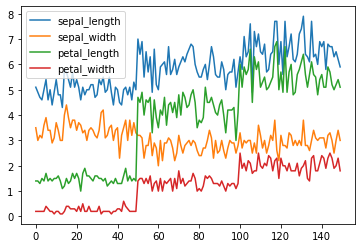

In [26]:
df.plot()
plt.show()

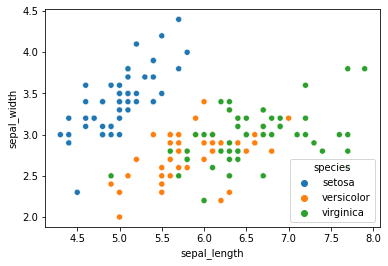

In [7]:
sns.scatterplot(data=df, x = 'sepal_length', y = 'sepal_width', hue='species')
plt.show()

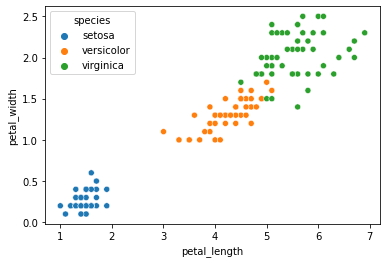

In [8]:
sns.scatterplot(data=df, x = 'petal_length', y = 'petal_width', hue='species')
plt.show()

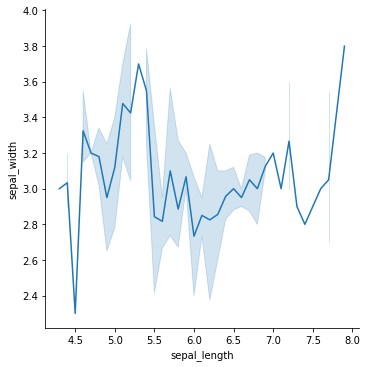

In [12]:
sns.relplot(data = df, x = 'sepal_length', y = 'sepal_width', kind='line')

plt.show()

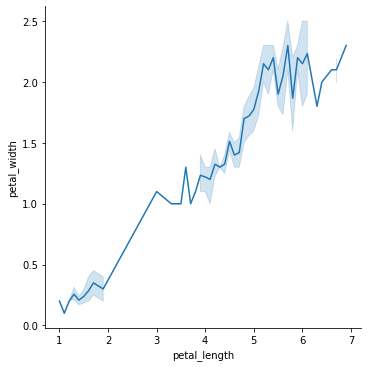

In [13]:
sns.relplot(data = df, x = 'petal_length', y = 'petal_width', kind='line')

plt.show()

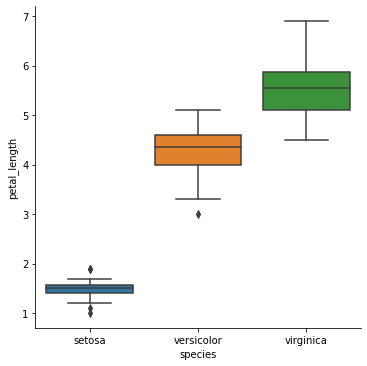

In [16]:
sns.catplot(data = df, x = 'species', y = 'petal_length',  kind = 'box')
plt.show()

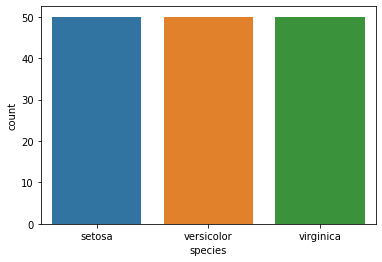

In [10]:
sns.countplot(data=df, x = 'species')
plt.show()

In [18]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# 3.Train Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4].to_numpy(), df['species'].to_numpy(), test_size=0.25, random_state=11)

In [67]:
X_train.shape

(112, 4)

In [68]:
y_train.shape

(112,)

# 4.Model Selection

In [69]:
clf = KNeighborsClassifier(n_neighbors=3)

In [70]:
model = clf.fit(X_train, y_train)

In [74]:
model.predict(X_test[0].reshape(1,-1))

array(['virginica'], dtype=object)

In [75]:
y_test[0]

'virginica'

# 5.Evaluation

In [93]:
model.score(X_test, y_test)

0.9473684210526315

In [77]:
y_test

array(['virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor'], dtype=object)

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor'], dtype=object)

In [83]:
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



# 6.Save Model

In [84]:
model_file = {'model':model}

with open('model.pickle', 'wb') as file:
    pickle.dump(model_file, file)

# 7.Load Model

In [89]:
with open('model.pickle', 'rb') as file:
    model_file = pickle.load(file)


In [91]:
model = model_file['model']

model.predict(X_test[9].reshape(1,-1))

array(['versicolor'], dtype=object)

In [92]:
y_test[9]

'versicolor'